In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Compute_ML_Task.csv')

In [4]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
df.drop(columns=['Sample code number'],inplace=True)

In [7]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [10]:
Y_predict=lr.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
cm=confusion_matrix(Y_test,Y_predict)
cm

array([[84,  2],
       [ 3, 48]], dtype=int64)

In [12]:
accuracy_score(Y_test,Y_predict)

0.9635036496350365

The accuracy is high and the fact that the model has been able to be right for 131 times We can use classification report to actually see if the predicted dataset is imbalanced.

In [13]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        86
           4       0.96      0.94      0.95        51

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



As we can see, the dataset is fairly balanced as recall scores are very high. 7 percent of class 4 type cancer results are "FRAUD"

In [14]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='visualization.html')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.44it/s]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.663684,0.666652,0.543815,0.586755,0.590770,0.533848,0.566398,0.421208,0.683080
Uniformity of Cell Size,0.663684,1.000000,0.894978,0.745475,0.792814,0.769543,0.720595,0.752510,0.512688,0.860299
Uniformity of Cell Shape,0.666652,0.894978,1.000000,0.718722,0.765073,0.752950,0.694888,0.724410,0.478400,0.843245
Marginal Adhesion,0.543815,0.745475,0.718722,1.000000,0.665190,0.696792,0.628738,0.636409,0.447254,0.737737
Single Epithelial Cell Size,0.586755,0.792814,0.765073,0.665190,1.000000,0.694579,0.645090,0.710628,0.483210,0.775066
Bare Nuclei,0.590770,0.769543,0.752950,0.696792,0.694579,1.000000,0.678963,0.659762,0.474316,0.835444
Bland Chromatin,0.533848,0.720595,0.694888,0.628738,0.645090,0.678963,1.000000,0.662096,0.390600,0.744571
Normal Nucleoli,0.566398,0.752510,0.724410,0.636409,0.710628,0.659762,0.662096,1.000000,0.510210,0.748601
Mitoses,0.421208,0.512688,0.478400,0.447254,0.483210,0.474316,0.390600,0.510210,1.000000,0.527379
Class,0.683080,0.860299,0.843245,0.737737,0.775066,0.835444,0.744571,0.748601,0.527379,1.000000


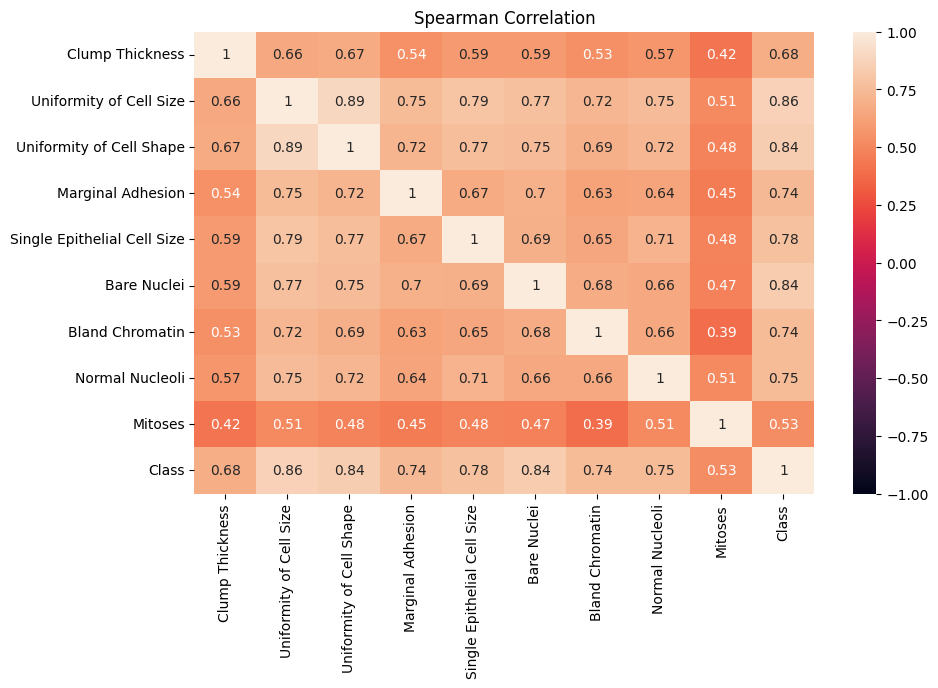

In [15]:
r = df.corr(method="spearman")
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation")
r

In a Spearmans Rank Correlation, if the p ratio comes closer to zero, it indicates a poorer correlation, a lot of values in mitoses shows a value closer to zero hence we can try dropping the column and seeing how it changes our result

In [16]:
df2 = pd.read_csv('Compute_ML_Task.csv')

In [17]:
df2.drop(columns=['Sample code number', 'Mitoses'],inplace=True)

In [19]:
c=df.iloc[:,0:-1].values
d=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
C_train,C_test,D_train,D_test=train_test_split(c,d,test_size=0.2)
C_train=sc.fit_transform(C_train)
C_test=sc.fit_transform(C_test)
lr2 = LogisticRegression(random_state = 0)
lr2.fit(C_train, D_train)
D_pred = lr2.predict(C_test)
print(confusion_matrix(D_test, D_pred))
print(classification_report(D_test, D_pred))
print(accuracy_score(D_test,D_pred))

[[83  3]
 [ 3 48]]
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        86
           4       0.94      0.94      0.94        51

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

0.9562043795620438


Recall values have dropped a little showing that mitoses as just as important even though it has a poor correlation in spearmans. We can conclude that 0.4 is still a big enough value to validate its correlation with other attributes